# 

# 분류의 성능 평가지표

In [89]:
# 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# seaborn lib add
import seaborn as sns

from glob import glob

%matplotlib inline

import json

import warnings
warnings.filterwarnings(action = 'ignore') 

from datetime import date, datetime, timedelta
from dateutil.parser import parse

print("numpy version:",np.__version__) 
print("pandas version:",pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_iris, load_breast_cancer

from IPython.display import Image

from sklearn.model_selection import train_test_split, KFold , StratifiedKFold, cross_val_score , cross_validate,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer, precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder,StandardScaler, MinMaxScaler, Binarizer
import graphviz

import missingno as msno

sklearn.__version__

numpy version: 1.20.1
pandas version: 1.2.4


'0.24.1'

### 정확도 : 실제 데이터와 예측 데이터가 얼마나 같은지를 판단하는 지표 (balance한 데이터에 적용하기 좋음)
- 문제점 : 이진분류의 경우 모델의 성능을 왜곡할 수 있다. & data가 inbalance한 경우에도 성능 왜곡할 수 있음.
    - 왜?
        - 해결책 : F1 score(Precision, Recall)
        

### 분류모델 성능 평가를 위한 이해
#### TP : target = 1 , predict=1 인 경우, 실제로도 1이고 예측도 1로 한 경우
#### TN : target = 0 , predict=0 인 경우, 실제로도 0이고 예측도 0으로 한 경우
#### FN : target = 1 , predict=0 인 경우, 실제로 1인데 예측을 0로 한 경우 → type 1 error
#### FP : target = 0 , predict=1 인 경우, 실제로 0인데 예측을 1로 한 경우 → type 2 error


In [10]:
target     = [1,0,0,1,1,1,0,1,1,1]
prediction = [0,1,1,1,1,0,1,0,1,0]

tp = tn = fn = fp = 0
for idx in range(len(target)):
    if target[idx]== 1 and prediction[idx]== 1:
        tp += 1
    if target[idx]== 0 and prediction[idx]== 0:
        tn += 1
    if target[idx]== 1 and prediction[idx]== 0:
        fn += 1
    if target[idx]== 0 and prediction[idx]== 1:
        fp += 1
        
print("tp : ",tp)
print("tn : ",tn)
print("fp : ",fp)
print("fn : ",fn)

tp :  3
tn :  0
fp :  3
fn :  4


In [13]:
print('accuracy : ',accuracy_score(target, prediction))
print('confusion_matrix : ',confusion_matrix(target, prediction))
print('precision : ',precision_score(target, prediction))
print('recall : ',recall_score(target, prediction))
print('f1 score : ',f1_score(target, prediction))

accuracy :  0.3
confusion_matrix :  [[0 3]
 [4 3]]
precision :  0.5
recall :  0.42857142857142855
f1 score :  0.4615384615384615


### f1 score가 accuracy보다 더 높고, recall과 precision의 차이가 크지 않으므로 f1 score 를 평가지표로 활용하는게 더 좋다.

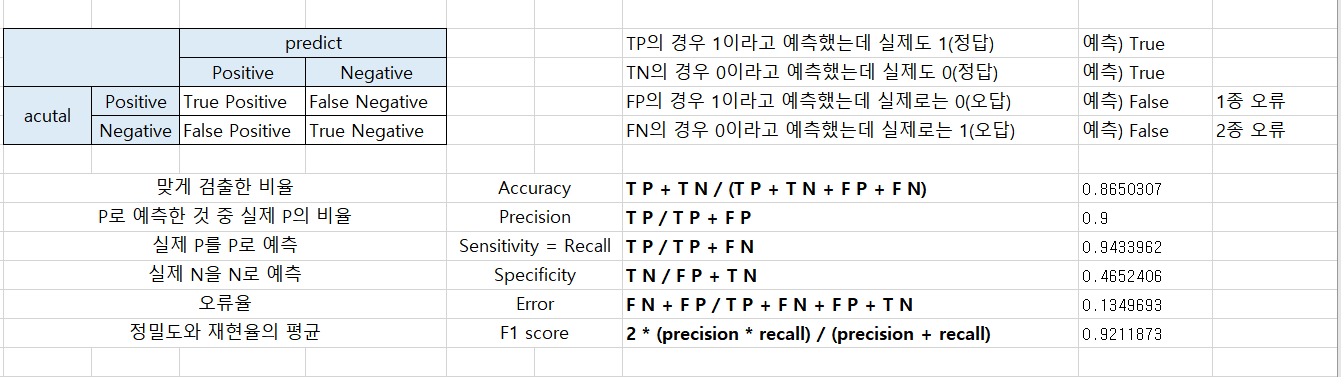

In [17]:
Image('C:/img/confusion_matrix_분석방법.png')

## 이진분류표
### 제품을 생산하는 제조공장에서 품질테스트를 실시하여 불량품을 찾아내고 불량품을 공장으로 돌려보낸다.
### 
### 품질 테스트의 결과가 양성 → 불량품을 예측 1
###                      음성 → 정상제품으로 예측 0
#### TP : 불량으로 예측하고 실제 불량인 것
#### TN : 정상으로 예측하고 실제 정상인 것
#### FP : 불량으로 예측했는데 실제 정상인 것
#### FN : 정상으로 예측했는데 실제 불량인 것


In [56]:
print(" 구분       | 불량 예측 |   정상예측")
print("------------------------------------")
print(" 불량품     |   TP      |     FN    ")
print("------------------------------------")
print(" 정상제품   |   FP      |     TN    ")

 구분       | 불량 예측 |   정상예측
------------------------------------
 불량품     |   TP      |     FN    
------------------------------------
 정상제품   |   FP      |     TN    


### 정밀도(Precision) : TP/(FP+TP)
- 예측을 Positive로 한 대상중에 예측과 실제값이 Positive로 일치한 데이터의 비율

### 재현율(Recall) : TP/(FN+TP)
- 실제값이 Positive인 대상중에 예측과 실제값이 Positive로 일치한 데이터의 비율

- 상대적으로 정밀도가 더 중요한 지표인 경우 : 스팸메일
- 상대적으로 정밀도가 더 중요한 지표인 경우 : 의학(암 진단), 금융(사기 판별)    

In [4]:
# 1. 데이터 불러오기
titanic_frm = pd.read_csv('C:/Users/whgud/data/titanic_train.csv')
titanic_frm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 정확도의 문제점 : 이진분류의 경우 데이터의 구성에 따라 모델의 성능을 왜곡할 수 있다

In [14]:
class UserEstimator(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self, X):
        pred = np.zeros((X.shape[0],1))
        for idx in range(X.shape[0]):
            if X['Sex'].iloc[idx]==1:
                pred[idx]=0
            else:
                pred[idx]=1
        return pred

In [15]:
titanic_features = titanic_frm.drop(['Survived'],axis = 1)
titanic_label = titanic_frm['Survived']
print('label type : ', type(titanic_label), 'features type : ', type(titanic_features))
titanic_features.head()

label type :  <class 'pandas.core.series.Series'> features type :  <class 'pandas.core.frame.DataFrame'>


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# 레이블 인코딩 Cabin , Sex , Embarked
def drop_features(frm):
    frm.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return frm


def pre_processing(frm):
    frm['Age'].fillna(frm['Age'].mean(), inplace=True)
    frm['Cabin'].fillna('N', inplace=True)
    frm['Embarked'].fillna('N', inplace=True)
    return frm


def label_encoder(frm):
    frm['Cabin'] = frm['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        encoder = LabelEncoder()
        encoder.fit(frm[feature])
        frm[feature] = encoder.transform(frm[feature])
    return  frm

def transform_features(frm):
    frm = drop_features(frm)
    frm = pre_processing(frm)
    frm = label_encoder(frm)
    return frm

In [17]:
subset_features = transform_features(titanic_features)
subset_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(subset_features,
                                                    titanic_label,
                                                    test_size=0.2,
                                                    random_state = 100)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [24]:
user_model = UserEstimator()

user_model.fit(X_train, y_train)
y_pred = user_model.predict(X_test)
print('accuracy : ', accuracy_score(y_test, y_pred)) # 비교적 높은 정확도가 나옴.

accuracy :  0.7877094972067039


In [28]:
def metrics_evaluation(target, prediction):
    print('accuracy : ',accuracy_score(target, prediction))
    print('confusion_matrix : ',confusion_matrix(target, prediction))
    print('precision : ',precision_score(target, prediction))
    print('recall : ',recall_score(target, prediction))
    print('f1 score : ',f1_score(target, prediction))

In [29]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

metrics_evaluation(y_test, y_pred)

#        FALSE    TRUE
# FALSE 90(TN)   14(FP)
# TRUE  21(FN)   54(TP)

accuracy :  0.8044692737430168
confusion_matrix :  [[90 14]
 [21 54]]
precision :  0.7941176470588235
recall :  0.72
f1 score :  0.7552447552447551


In [34]:
print('accuracy : ', (90+54)/(90+14+21+54))
print('recall : ' , 54/(21+54))
print('precision : ',54/(54+14) )

accuracy :  0.8044692737430168
recall :  0.72
precision :  0.7941176470588235


In [36]:
# 교차검증

fold = KFold(n_splits = 20)
scoring = {
    'accuracy' : make_scorer(accuracy_score),
    'precision' : make_scorer(precision_score),
    'recall' : make_scorer(recall_score),
    'f1_score' : make_scorer(f1_score)
}

result = cross_validate(lr_model, X_train, y_train, cv = fold, scoring = scoring)
result

{'fit_time': array([0.11568999, 0.10172629, 0.09374905, 0.08277488, 0.0668211 ,
        0.09584117, 0.07978821, 0.08977437, 0.08476973, 0.08776641,
        0.12722015, 0.07180738, 0.07479978, 0.07081056, 0.11572266,
        0.06882119, 0.06909919, 0.08477354, 0.08178115, 0.07579875]),
 'score_time': array([0.01296806, 0.01396179, 0.01595807, 0.01296878, 0.01196671,
        0.0149591 , 0.00797749, 0.014961  , 0.01695609, 0.01197147,
        0.01196265, 0.01496148, 0.00698161, 0.0109694 , 0.01197028,
        0.01296067, 0.01097322, 0.01097155, 0.01096845, 0.00997257]),
 'test_accuracy': array([0.75      , 0.83333333, 0.75      , 0.61111111, 0.75      ,
        0.80555556, 0.94444444, 0.80555556, 0.75      , 0.69444444,
        0.75      , 0.86111111, 0.82857143, 0.82857143, 0.85714286,
        0.85714286, 0.74285714, 0.74285714, 0.77142857, 0.85714286]),
 'test_precision': array([0.83333333, 0.77777778, 0.64705882, 0.8       , 0.70588235,
        0.91666667, 0.83333333, 0.63157895, 0.833

In [37]:
print('accuracy : ',result['test_accuracy'].mean())
print('confusion_matrix : ',result['test_recall'].mean())
print('precision : ',result['test_precision'].mean())
print('recall : ',result['test_recall'].mean())
print('f1 score : ',result['test_f1_score'].mean())

accuracy :  0.7895634920634922
confusion_matrix :  0.7128234347351995
precision :  0.7322879809818664
recall :  0.7128234347351995
f1 score :  0.7051405220617317


#### 유방암 관련데이터 = 정확, 재현율 중요(실제 P를 N으로 예측하면 안되기 때문에)
#### 재현율은 실제 양성을 양성으로 예측한 비율이 높을수록 좋은 성능의 모델로 판단할 수 있기 때문

In [38]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [40]:
# 데이터프레임으로 만들기
cancer_frm = pd.DataFrame(data = cancer['data'],
                         columns = cancer['feature_names'])
cancer_frm['target'] = cancer['target']
cancer_frm.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [41]:
cancer_frm['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [43]:
cancer_label = cancer_frm['target']
cancer_features = cancer_frm.drop(['target'], axis = 1)
print('label type : ', type(cancer_label), 'features type : ', type(cancer_features))
cancer_features.head()

label type :  <class 'pandas.core.series.Series'> features type :  <class 'pandas.core.frame.DataFrame'>


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3개의 모델 성능비교

In [47]:
# 3개의 모델 성능비교
X_train, X_test, y_train, y_test = train_test_split(cancer_features,
                                                    cancer_label,
                                                    test_size=0.2,
                                                    random_state = 100)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

metrics_evaluation(y_test, y_pred)

#        FALSE    TRUE
# FALSE 48TN)   1(FP)
# TRUE  1(FN)   64(TP)        
# recall과 precision도 별차이 없고 recall이 98%로 높고 
# f1 score도 높고 정확도도 높기때문에 괜찮은 모델이라고 판단할 수 있다.

accuracy :  0.9824561403508771
confusion_matrix :  [[48  1]
 [ 1 64]]
precision :  0.9846153846153847
recall :  0.9846153846153847
f1 score :  0.9846153846153847


In [50]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

metrics_evaluation(y_test, y_pred)


accuracy :  0.9473684210526315
confusion_matrix :  [[46  3]
 [ 3 62]]
precision :  0.9538461538461539
recall :  0.9538461538461539
f1 score :  0.9538461538461539


In [51]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

metrics_evaluation(y_test, y_pred)

accuracy :  0.9473684210526315
confusion_matrix :  [[46  3]
 [ 3 62]]
precision :  0.9538461538461539
recall :  0.9538461538461539
f1 score :  0.9538461538461539


### 모델 성능 비교 결과 :  RandomForestClassifier모델이 가장 성능이 좋다.

### 교차검증 cross_validate후 성능평가 : 제현율이 높게 나오는 방법은 어떤 것인지?


In [53]:

fold = KFold(n_splits = 20)
scoring = {
    'accuracy' : make_scorer(accuracy_score),
    'precision' : make_scorer(precision_score),
    'recall' : make_scorer(recall_score),
    'f1_score' : make_scorer(f1_score)
}

result = cross_validate(rf_model, X_train, y_train, cv = fold, scoring = scoring)
result

print('accuracy : ',result['test_accuracy'].mean())
print('confusion_matrix : ',result['test_recall'].mean())
print('precision : ',result['test_precision'].mean())
print('recall : ',result['test_recall'].mean())
print('f1 score : ',result['test_f1_score'].mean())

accuracy :  0.9626482213438734
confusion_matrix :  0.9815705128205128
precision :  0.9603605912061794
recall :  0.9815705128205128
f1 score :  0.9695954802813318


### 교차검증 GridSearchCV 후 성능평가 : 재현율이 높게 나오는 방법은 어떤 것인지?
#### RandomForestClassifier모델 활용
#### n_estimators: 생성할 tree의 개수를 의미
#### max_features : 최대 선택할 피처의 수를 의미 (값을 크게 하면? tree의 depth가 낮아짐, 값을 작게하면? tree이 depth가 깊어짐)
#### max_depth : 최대 선택할 트리의 깊이를 의미

In [109]:
params = {
    'n_estimators':[200,300],
    'max_features':[6,8,15,20],
    'max_depth':[4,6,8] # 숫자들은 임의로 줄 수 있음
    
}

cv_rf_model =  GridSearchCV(rf_model, # 교차검증과 튜닝이 된 객체가 만들어짐.
                        param_grid=params ,
                        cv=20,
                        refit =True,
                        scoring ='recall'
                        )

cv_rf_model.fit(X_train, y_train)
cv_rf_model.cv_results_

{'mean_fit_time': array([0.59454664, 0.68217911, 0.4851488 , 0.71646094, 0.11479201,
        0.17935905, 0.11712219, 0.17321843, 0.48726362, 0.72723622,
        0.52058688, 0.77070062, 0.11687547, 0.17283194, 0.11557533,
        0.17396853, 0.51493729, 0.76553719, 0.54646585, 0.82148273,
        0.12361505, 0.19073482, 0.11846485, 0.17377993]),
 'std_fit_time': array([0.0810269 , 0.05677968, 0.02412997, 0.01852573, 0.0056076 ,
        0.01269565, 0.00507176, 0.0074334 , 0.01485705, 0.01386907,
        0.01545675, 0.01549958, 0.00650616, 0.00857972, 0.0053035 ,
        0.01380272, 0.01903924, 0.01170378, 0.01344951, 0.01329276,
        0.01290802, 0.0393193 , 0.00837277, 0.01127904]),
 'mean_score_time': array([0.03949503, 0.04389845, 0.03181393, 0.04283798, 0.        ,
        0.        , 0.        , 0.        , 0.02992166, 0.04583806,
        0.03198789, 0.04254887, 0.        , 0.        , 0.        ,
        0.        , 0.03196485, 0.04320409, 0.03076407, 0.04379592,
        0.      

In [110]:

print('최적의 파라미터 확인')
print()
print(cv_rf_model.best_params_)
print('높은 정확도 확인')
print()
print(cv_rf_model.best_score_)




최적의 파라미터 확인

{'max_depth': 8, 'max_features': 8, 'n_estimators': 200}
높은 정확도 확인

0.703021978021978


In [111]:
estimator=cv_rf_model.best_estimator_
y_pred = estimator.predict(X_test)


In [112]:
metrics_evaluation(y_test, y_pred)

accuracy :  0.8100558659217877
confusion_matrix :  [[93 11]
 [23 52]]
precision :  0.8253968253968254
recall :  0.6933333333333334
f1 score :  0.7536231884057971


### 정밀도와 재현율을 임의로 조정하는 모델을 생성해야할 경우가 있다.
- 정밀도와 재현율의 맹점이 있으므로, 상호 보완할 수 있는 지점이 필요하다 -trade_off
- 임계값(threshold)를 조절해서 default : 0.5 , 0 < default < 1
- Binarizer - fit_transform()
- 분류 결정 임계값이 낮아질수록 Positive로 예측할 확률이 높아지게 된다(재현률이 증가)
- 단, 재현률(recall)이 높아지면, 정밀도가 떨어질 수 있음
- predict_proba()를 통해서 개별 레이블별 예측확률을 반환받아야 한다.

In [65]:
matrix = [
    [-1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]]

In [66]:
holder = Binarizer() # 0.5보다 작은 값은 0을 리턴, 0.5보다 큰 값은 1을 리턴
print(holder.fit_transform(matrix))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 1.]]


In [67]:
holder = Binarizer(threshold = 1.1) # 1.1보다 작은 값은 0을 리턴, 1.1보다 큰 값은 1을 리턴
print(holder.fit_transform(matrix))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [72]:
# 타이타닉 데이터로 Binarizer활용해보기
titanic_features = titanic_frm.drop(['Survived'],axis = 1)
titanic_label = titanic_frm['Survived']

In [69]:
subset_features = transform_features(titanic_features)
subset_features

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [70]:
X_train, X_test, y_train, y_test = train_test_split(subset_features,
                                                    titanic_label,
                                                    test_size=0.2,
                                                    random_state = 100)

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [73]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

metrics_evaluation(y_test,y_pred)

accuracy :  0.8044692737430168
confusion_matrix :  [[90 14]
 [21 54]]
precision :  0.7941176470588235
recall :  0.72
f1 score :  0.7552447552447551


### 확률 예측값 구해보기 - predict_proba()사용

In [77]:
predict_proba_result = logistic_model.predict_proba(X_test)
print('type : ', type(predict_proba_result))
print('shape : ', predict_proba_result.shape) 
print(predict_proba_result) # 2개의 값을 더하면 1이 나옴. -> threshold 적용해서 둘중 큰값을 취한다.

type :  <class 'numpy.ndarray'>
shape :  (179, 2)
[[0.1689954  0.8310046 ]
 [0.2693339  0.7306661 ]
 [0.89474646 0.10525354]
 [0.41530555 0.58469445]
 [0.86431005 0.13568995]
 [0.23610716 0.76389284]
 [0.89855001 0.10144999]
 [0.78547805 0.21452195]
 [0.05865905 0.94134095]
 [0.64014209 0.35985791]
 [0.02315873 0.97684127]
 [0.87338663 0.12661337]
 [0.87148641 0.12851359]
 [0.57717143 0.42282857]
 [0.41745833 0.58254167]
 [0.81903669 0.18096331]
 [0.06597913 0.93402087]
 [0.60288703 0.39711297]
 [0.66140438 0.33859562]
 [0.86855815 0.13144185]
 [0.90509295 0.09490705]
 [0.04090196 0.95909804]
 [0.85857775 0.14142225]
 [0.32518257 0.67481743]
 [0.89854487 0.10145513]
 [0.905074   0.094926  ]
 [0.32293118 0.67706882]
 [0.83231859 0.16768141]
 [0.9227272  0.0772728 ]
 [0.84089547 0.15910453]
 [0.99143516 0.00856484]
 [0.27583239 0.72416761]
 [0.43694239 0.56305761]
 [0.81333876 0.18666124]
 [0.03543029 0.96456971]
 [0.9156092  0.0843908 ]
 [0.13305643 0.86694357]
 [0.13257506 0.86742494]


### 예측값과 예측확률 결과를 병합해보자

In [78]:
# y_pred : 예측값 , predict_proba_result : 예측확률

pred_prob_concat = np.concatenate([predict_proba_result, y_pred.reshape(-1,1)],axis=1)
pred_prob_concat
# 왼쪽이 0일 확률, 오른쪽이 1일 확률이라 더 큰 확률의 수가 예측값으로 나온 것.

array([[0.1689954 , 0.8310046 , 1.        ],
       [0.2693339 , 0.7306661 , 1.        ],
       [0.89474646, 0.10525354, 0.        ],
       [0.41530555, 0.58469445, 1.        ],
       [0.86431005, 0.13568995, 0.        ],
       [0.23610716, 0.76389284, 1.        ],
       [0.89855001, 0.10144999, 0.        ],
       [0.78547805, 0.21452195, 0.        ],
       [0.05865905, 0.94134095, 1.        ],
       [0.64014209, 0.35985791, 0.        ],
       [0.02315873, 0.97684127, 1.        ],
       [0.87338663, 0.12661337, 0.        ],
       [0.87148641, 0.12851359, 0.        ],
       [0.57717143, 0.42282857, 0.        ],
       [0.41745833, 0.58254167, 1.        ],
       [0.81903669, 0.18096331, 0.        ],
       [0.06597913, 0.93402087, 1.        ],
       [0.60288703, 0.39711297, 0.        ],
       [0.66140438, 0.33859562, 0.        ],
       [0.86855815, 0.13144185, 0.        ],
       [0.90509295, 0.09490705, 0.        ],
       [0.04090196, 0.95909804, 1.        ],
       [0.

In [86]:
print('--threshold가 default인 경우--')
print()
metrics_evaluation(y_test,y_pred)

--threshold가 default인 경우--

accuracy :  0.8044692737430168
confusion_matrix :  [[90 14]
 [21 54]]
precision :  0.7941176470588235
recall :  0.72
f1 score :  0.7552447552447551


In [84]:
user_th = 0.3 # 임계값을 낮춰서 Positive로 예측할 확률을 높게해줌.
print('predict_proba_result 두번째 컬럼이 positive일 확률')
predict_proba_positive = predict_proba_result[:,1].reshape(-1,1)

user_pred = Binarizer(threshold = user_th).fit_transform(predict_proba_positive)
user_pred

predict_proba_result 두번째 컬럼이 positive일 확률


array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],

In [88]:
# threshold가 0.3일때
print('--threshold가 0.3일때--')
print()
metrics_evaluation(y_test,user_pred) # recall이 0.72에서 0.773..으로 올랐음.

--threshold가 0.3일때--

accuracy :  0.7932960893854749
confusion_matrix :  [[84 20]
 [17 58]]
precision :  0.7435897435897436
recall :  0.7733333333333333
f1 score :  0.7581699346405228


#### TRAD-OFF를 확인하기 위해서 시각화 해보기
- precision_recall_curve(실제값, 예측 확률 값) : 임계값 변화에 따른 평가 지표 값을 반환
- 변환값 : 정밀도, 재현율, 임계값

In [100]:
print('predict_proba_result 두번째 컬럼이 positive일 확률')
predict_proba_positive = predict_proba_result[:,1]
precision, recalls, thresholds =precision_recall_curve(y_test,predict_proba_positive)
print('precision shape:',precision.shape)
print('recalls shape:',recalls.shape)
print('thresholds shape:',thresholds.shape) # 1개가 적다.

predict_proba_result 두번째 컬럼이 positive일 확률
precision shape: (149,)
recalls shape: (149,)
thresholds shape: (148,)


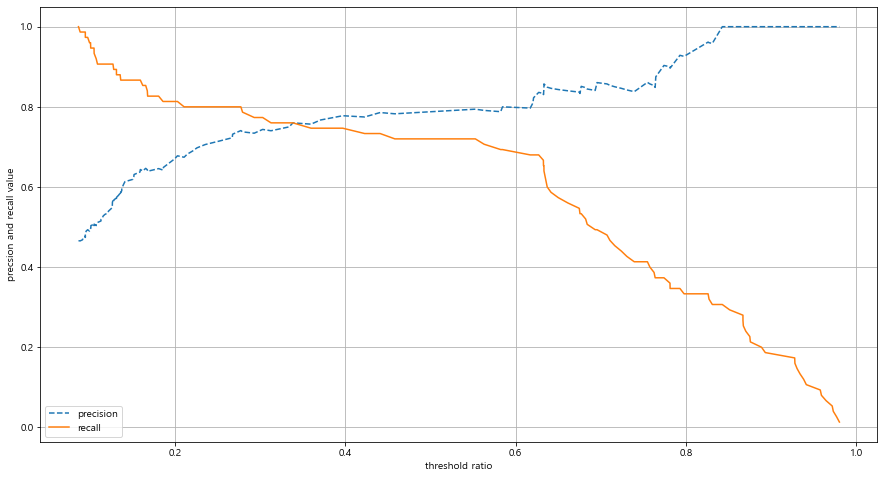

In [108]:
plt.figure(figsize= (15,8))

plt.plot(thresholds,precision[0:thresholds.shape[0]],linestyle = '--', label ='precision')
plt.plot(thresholds,recalls[0:thresholds.shape[0]],linestyle = '-', label ='recall')

plt.xlabel('threshold ratio')
plt.ylabel('precsion and recall value')
plt.grid()
plt.legend()
plt.show()
plt.close()